In [6]:
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import praw

user_agent = "Scraper 1.0"
reddit = praw.Reddit(
    client_id = "gscPTd0wywq_IjgqoL1Smg",
    client_secret = "UAeWcM7eWeVXQVRJLZehtFq655Dzmw",
    user_agent = user_agent
)

In [8]:
headlines = set()

for submission in reddit.subreddit('politics').hot(limit = None):
    #print(submission.title)
    #print(submission.id)
    #print(submission.author)
    #print(submission.created_utc)
    #print(submission.score)
    #print(submission.upvote_ratio)
    #print(submission.url)
    #break
    headlines.add(submission.title)
for submission in reddit.subreddit('news').hot(limit = None):
    headlines.add(submission.title)
for submission in reddit.subreddit('worldnews').hot(limit = None):
    headlines.add(submission.title)
for submission in reddit.subreddit('technology').hot(limit = None):
    headlines.add(submission.title)
print(len(headlines))


2094


In [9]:
df = pd.DataFrame(headlines)
df.head()

,0
0,Embracer Group Looks to Sell Video Game Studio...
1,Chesebro advances adventurous argument on ‘fak...
2,'I didn't come here to shut the government dow...
3,Democrats Continue Special Election Streak In ...
4,Russia strikes cities from east to west Ukrain...


In [10]:
df.to_csv('headlines.csv', header = False, encoding = 'utf-8', index = False)

In [11]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Albert\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()
results = []
for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:3], width = 100 )

[{'compound': 0.0,
  'headline': 'Embracer Group Looks to Sell Video Game Studio Gearbox',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': -0.0258,
  'headline': 'Chesebro advances adventurous argument on ‘fake elector’ plot',
  'neg': 0.229,
  'neu': 0.55,
  'pos': 0.22},
 {'compound': 0.0,
  'headline': "'I didn't come here to shut the government down', says House Republican",
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


In [13]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.000,1.000,0.000,0.0000,Embracer Group Looks to Sell Video Game Studio...
1,0.229,0.550,0.220,-0.0258,Chesebro advances adventurous argument on ‘fak...
2,0.000,1.000,0.000,0.0000,'I didn't come here to shut the government dow...
3,0.000,0.748,0.252,0.4019,Democrats Continue Special Election Streak In ...
4,0.365,0.635,0.000,-0.7845,Russia strikes cities from east to west Ukrain...


In [14]:
df['label'] = 0 
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < 0.2, 'label'] = -1
df.loc[(0.2 > df['compound']) & (df['compound'] > -0.2), 'label'] = 0
df.head()



,neg,neu,pos,compound,headline,label
0,0.000,1.000,0.000,0.0000,Embracer Group Looks to Sell Video Game Studio...,0
1,0.229,0.550,0.220,-0.0258,Chesebro advances adventurous argument on ‘fak...,0
2,0.000,1.000,0.000,0.0000,'I didn't come here to shut the government dow...,0
3,0.000,0.748,0.252,0.4019,Democrats Continue Special Election Streak In ...,1
4,0.365,0.635,0.000,-0.7845,Russia strikes cities from east to west Ukrain...,-1


In [15]:
df2 = df[['headline', 'label']]

In [16]:
df2.to_csv('reddit_headline_labels.csv', encoding = 'utf-8', index = False)

In [17]:
df.label.value_counts()

 0    925
-1    775
 1    394
Name: label, dtype: int64

In [18]:
df.label.value_counts(normalize = True) * 100

 0    44.173830
-1    37.010506
 1    18.815664
Name: label, dtype: float64

In [19]:
print("Positive headlines: \n")
pprint(list(df[df['label'] == 1].headline)[:5], width = 200)

print("\nNegative headlines: \n")
pprint(list(df[df['label'] == -1].headline)[:5], width = 200)

Positive headlines: 

['Democrats Continue Special Election Streak In Pennsylvania, New Hampshire',
 'M.B.A. Students vs. ChatGPT: Who Comes Up With More Innovative Ideas? | We put humans and AI to the test. The results weren’t even close.',
 'This Is the True Scale of New York’s Airbnb Apocalypse',
 "California's controversial CARE Court brings mental health care into the courtroom",
 'Exclusive: Huawei unit ships Chinese-made surveillance chips in fresh comeback sign']

Negative headlines: 

['Russia strikes cities from east to west Ukraine, starting fires and killing at least 2',
 '‘There is no way out’: residents of Nagorno-Karabakh fear worst as Azerbaijan’s troops take control',
 'New College of Florida under investigation for alleged civil rights violation',
 'Fake Spare Parts Were Supplied to Fix Top-Selling Jet Engine',
 'Schumer Filing Cloture on Trio of Military Promotions Blocked by Sen. Tommy Tuberville']


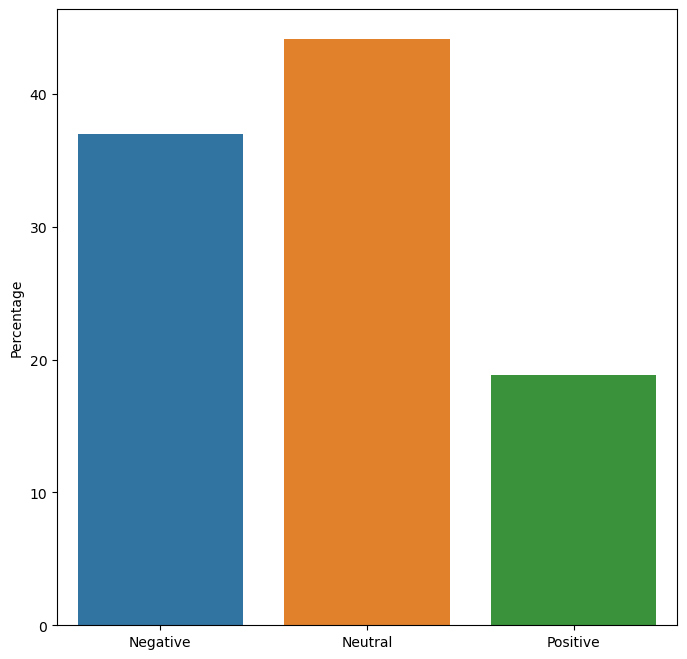

In [20]:
fig, ax = plt.subplots(figsize = (8, 8))
counts = df.label.value_counts(normalize = True)*100

sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(["Negative", "Neutral", "Positive"])
ax.set_ylabel("Percentage")
plt.show()

In [27]:
#compound score is the overall sentiment of the headline, 
#which can range from -1 to +1 with -1 being negative sentiment and +1 being positive
#final input into the ML models will be the compound score
compound = df[['compound', 'headline']]
compound.head()

,compound,headline
0,0.0000,Embracer Group Looks to Sell Video Game Studio...
1,-0.0258,Chesebro advances adventurous argument on ‘fak...
2,0.0000,'I didn't come here to shut the government dow...
3,0.4019,Democrats Continue Special Election Streak In ...
4,-0.7845,Russia strikes cities from east to west Ukrain...
